In [171]:
import pandas as pd

In [172]:
data = pd.read_csv('data/wine_cleared.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [173]:
# Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

In [174]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [175]:
# Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [176]:
data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [177]:
# 2.2
# Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

# В ответ впишите результат выполнения кода data['is_france'].sum()
display(data['is_france'].sum()) # 22093

# В ответ впишите результат выполнения кода data['is_italy'].sum()
display(data['is_italy'].sum()) # 19540

22093

19540

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int64  
 14  year                   125362 non-nu

In [179]:
# 2.3
#Создайтте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

data['year'] = pd.to_datetime(data['year'], errors='coerce')
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

In [180]:
# 2.7
# Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

#Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. 
# В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)
data['locality']

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: locality, Length: 129971, dtype: object

### РАБОТА С ФАЙЛАМИ

In [181]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [182]:
# 3.1
# Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.

mask = country_population['country'] =='Italy'
country_population[mask]

,country,population
24,Italy,"59,097,904"


In [183]:
data = data.join(country_population.set_index('country'), on='country')

In [184]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [185]:
# 3.2
# Создайте новый признак area_country — площадь страны, аналогичный признаку country_population.
# Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? 
# Ответ вводите без пробелов, округлите до целых.

data = data.join(country_area.set_index('country'), on='country')
mask = data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'
data[mask]

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,2014-01-01,1,0,0,0,Columbia Valley (WA,"333,022,386",9372610.0


### Работа с форматом дата-время

In [186]:

# client_id — идентификатор клиента в базе;
# agent_date — время соединения с агентом;
# created_at — время соединения с клиентом (начало разговора);
# end_date — время окончания соединения с клиентом (конец разговора).

In [187]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [188]:
# Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 
# Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [189]:
# 4.1
# Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.
# В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

In [190]:
# 4.2
# Создайте новый признак is_connection — факт соединения с клиентом. 
# Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.
# В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum()

calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls['is_connection'].sum()

7

In [191]:
# 4.3
# Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.
# В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [192]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [193]:
# 4.5
# Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. 
# За дату отсчёта возьмите 12 января 2022 года. 
# В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

data['years_diff'] = (pd.to_datetime('2022-01-12') - data['year']).dt.days
data['years_diff'].max()

98627.0

### Кодирование признаков

In [194]:
import category_encoders as ce

In [126]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [124]:
# Выполним теперь кодирование порядкового признака size и type признака в Python. 
# Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

# Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. 
# Затем используем метод concat() для добавления закодированного признака в датафрейм data.

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


In [125]:
clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   size    10 non-null     object
 1   type    10 non-null     object
 2   size    10 non-null     int64 
 3   type    10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [195]:
data['year'].sort_values()

67141    1752-01-01
68586    1789-01-01
113629   1821-01-01
42594    1821-01-01
43085    1821-01-01
            ...    
129710          NaT
129719          NaT
129743          NaT
129869          NaT
129929          NaT
Name: year, Length: 129972, dtype: datetime64[ns]

In [196]:
# 5.3
# Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием

ord_encoder = ce.OrdinalEncoder(cols=['year'])
ord_encoder.fit(data['year'].sort_values())
data['year_encoded'] = ord_encoder.transform(data['year'])

data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year_encoded
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,77
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,75
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0,77
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0,77
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,2013-01-01,0,0,0,0,Erben Müller-Burggraef,"83,129,285",357022.0,3298.0,77
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0,68
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0,77
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0,76


#### Однократное кодирование

In [127]:
# Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. 
# Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

# удалить ранее созданные столбцы с кодированием!
encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

# use_cat_names=False
clothing

,size,type,type_1,type_2,type_3,type_4
0,xxs,dress,1,0,0,0
1,xxs,skirt,0,1,0,0
2,xs,dress,1,0,0,0
3,s,skirt,0,1,0,0
4,m,dress,1,0,0,0
5,l,shirt,0,0,1,0
6,s,coat,0,0,0,1
7,m,coat,0,0,0,1
8,xxl,shirt,0,0,1,0
9,l,dress,1,0,0,0


In [ ]:
#На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). 
# Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, 
# для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

clothing_dummies = pd.get_dummies(clothing, columns=['type'])

In [197]:
# 5.4
# В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

# В ответе напишите, сколько признаков добавилось после применения кодирования.

encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,0,0,0,0,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0


#### Бинарное кодирование

In [129]:
# Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. 
# Используем класс BinaryEncoder библиотеки category_encoders.


clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])

bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_0,type_1,type_2
0,xxs,dress,0,0,1
1,xxs,skirt,0,1,0
2,xs,dress,0,0,1
3,s,skirt,0,1,0
4,m,dress,0,0,1
5,l,shirt,0,1,1
6,s,coat,1,0,0
7,m,coat,1,0,0
8,xxl,shirt,0,1,1
9,l,dress,0,0,1


In [198]:
# 5.5
# Закодируйте признак country двоичным способом.

# Сколько новых признаков образовалось после кодирования признака country?

encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)

data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_17,taster_name_18,taster_name_19,taster_name_20,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,0,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,1,0,1


In [199]:
# 5.8
# На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров 
# и закодируйте его.

# В ответе напишите, сколько признаков добавилось после применения кодирования.

data['taster_twitter_handle'].nunique()

encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,1,1,0,0,0,1,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0


In [136]:
# 5.9
# Используйте следующий датафрейм для задания:

list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
# Определите типы признаков и закодируйте их в соответствии с изученными способами.

encoder = ce.OneHotEncoder(cols=['product', 'payment_type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df[['product', 'payment_type']])
df = pd.concat([df, type_bin], axis=1)

df

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


### Нормализация

In [137]:
# Используем библиотеку numpy для создания массивов случайных чисел различных распределений. 
# Выполните этот код, чтобы создать обучающий набор различных распределений:

import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

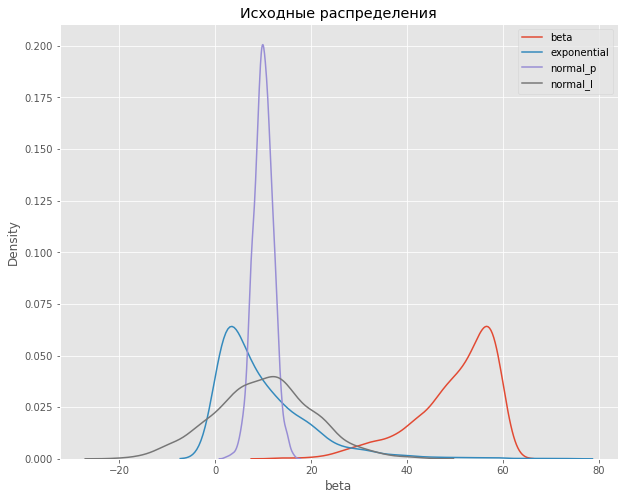

In [138]:
# Рассмотрим распределения на графике. 
# Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. 
# Он представляет собой непрерывную линию плотности вероятности. 
# Подробнее об этой функции вы можете прочитать в руководстве.

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [139]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

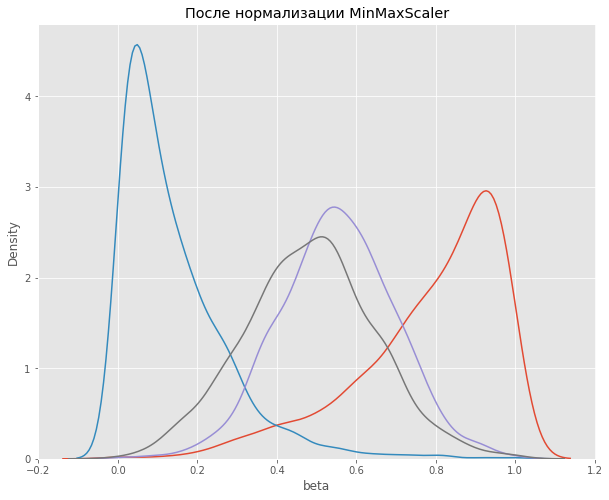

In [140]:
#Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. 
# Вы познакомитесь с ней подробнее в модулях машинного обучения.

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

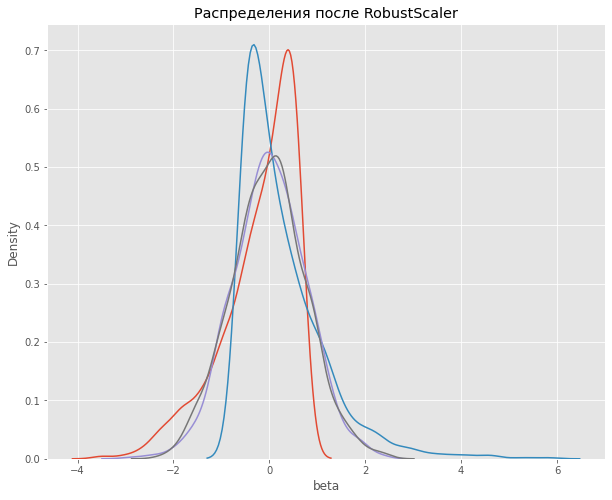

In [141]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

### Стандартизация

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

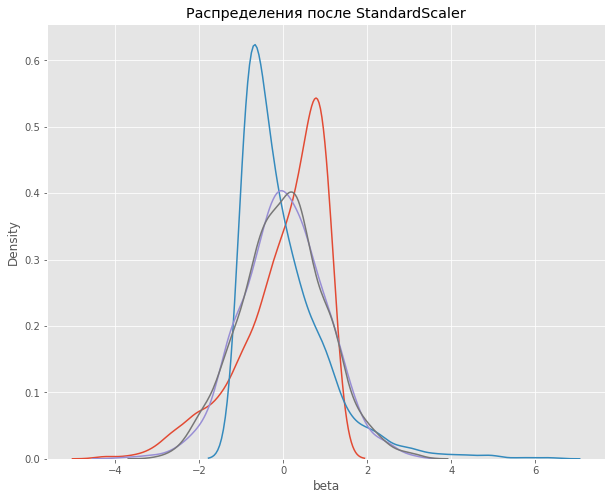

In [142]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

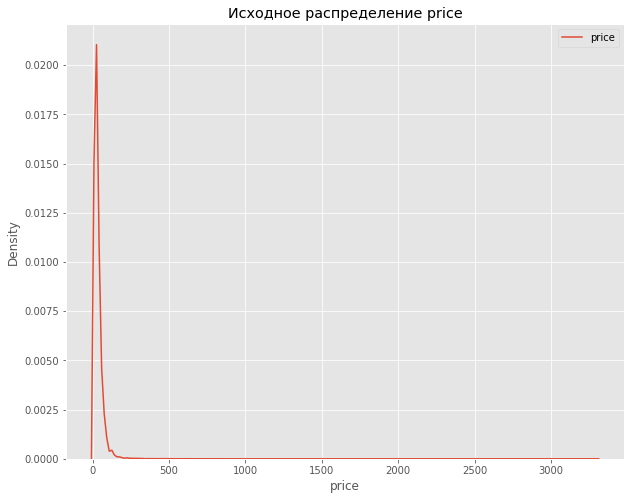

In [143]:
# 6.4
# Нормализуйте признак price. Используйте подходящий тип нормализации.

# В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходное распределение price')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data['price'], ax=ax1, label ='price')

plt.legend()

In [158]:
# RobustScaler
mm_scaler =  preprocessing.RobustScaler()

# копируем исходный датасет
data_mm = mm_scaler.fit_transform(data[['price']])

data_mm = pd.DataFrame(data_mm, columns=['price'])

data_mm['price'].sum()

43500.77493697044

In [163]:
# 6.5
# Стандартизируйте исходный признак price.

# В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.
data = pd.read_csv('data/wine_cleared.csv')
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
data_s = s_scaler.fit_transform(data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_s = pd.DataFrame(data_s, columns=['price'])

data_s['price'][129968]

-0.13551812448719314

### Отбор признаков. Мультиколлениарность

In [165]:
# обучающий набор про ирисы

iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

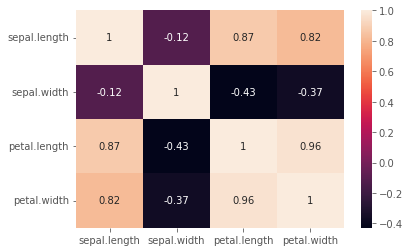

In [167]:
# Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [168]:
# Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: 
# sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.

# Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. 
# Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

iris = iris.drop(['petal.width'], axis=1)
# Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:

iris = iris.drop(['petal.length'], axis=1)

iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


<AxesSubplot:>

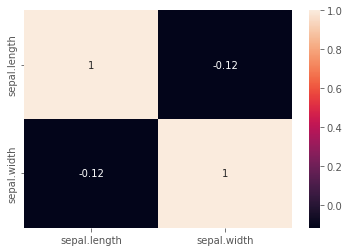

In [169]:
sns.heatmap(iris.corr(), annot=True)

In [202]:
# 7.3
# Какие из признаков имеют самую сильную корреляционную связь? (про винные обзоры)
pd.set_option('display.max_columns', None)
data.corr()

,Unnamed: 0,points,price,price_round,is_usa,is_france,is_italy,old_wine,area,years_diff,year_encoded,taster_name_1,taster_name_2,taster_name_3,taster_name_4,taster_name_5,taster_name_6,taster_name_7,taster_name_8,taster_name_9,taster_name_10,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20,country_0,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
Unnamed: 0,1.000000,0.007125,0.004648,0.004662,0.010928,-0.002187,-0.010178,-0.020657,0.011775,-0.016941,0.019835,-0.001919,-0.006653,-0.004070,-0.001603,-0.003838,0.006095,0.004862,0.007525,-0.008287,0.013706,0.005671,0.000164,0.007386,-0.003379,0.006719,0.005337,-0.007546,0.009742,0.002223,-0.001707,0.003732,0.002809,-0.001704,-0.001534,0.010816,0.002517,-0.001707,0.012235,-0.001283,-0.000425,0.003705
points,0.007125,1.000000,0.402136,0.402064,0.032592,0.059248,0.015926,-0.046069,0.023427,-0.034794,0.024506,0.041624,0.042413,0.058808,-0.048256,-0.183876,-0.001944,0.070935,0.116255,-0.107895,0.020235,0.010739,0.005952,0.118878,-0.027858,0.013567,-0.002581,-0.055476,-0.022082,-0.007389,-0.001372,-0.013685,-0.018852,-0.036594,-0.019548,0.031306,0.062680,-0.001372,0.050516,-0.140644,0.183248,0.030899
price,0.004648,0.402136,1.000000,0.999997,0.025873,0.053139,0.039566,0.055670,0.021446,0.052737,-0.077894,0.045876,0.032450,-0.012171,-0.008980,-0.091814,-0.026131,0.079801,0.018468,0.017044,-0.006380,-0.038748,-0.000938,-0.016450,-0.030684,-0.011281,-0.020428,-0.028554,-0.003784,-0.001535,-0.001035,-0.019886,-0.019101,-0.070159,0.003017,-0.016842,0.085449,-0.001035,-0.051194,-0.022783,0.058051,-0.056477
price_round,0.004662,0.402064,0.999997,1.000000,0.026379,0.052615,0.039314,0.055568,0.021984,0.052654,-0.077805,0.045836,0.031814,-0.012002,-0.008947,-0.091623,-0.026030,0.079972,0.018580,0.017056,-0.006268,-0.038634,-0.000858,-0.016463,-0.030681,-0.011252,-0.020389,-0.028505,-0.003765,-0.001526,-0.001031,-0.019860,-0.019060,-0.070117,0.002713,-0.016389,0.085427,-0.001031,-0.051023,-0.022453,0.057807,-0.056189
is_usa,0.010928,0.032592,0.025873,0.026379,1.000000,-0.384584,-0.357477,-0.007442,0.966549,-0.004996,-0.021131,-0.255523,-0.419923,0.317338,0.066598,-0.305057,0.050229,0.331129,0.266220,0.224056,0.231931,0.214421,-0.164333,-0.145168,-0.099187,-0.053601,-0.052332,-0.038215,0.038502,0.016962,0.005700,-0.037007,-0.082210,-0.302466,-0.542348,0.757849,0.412552,0.005700,0.012343,0.256748,0.000427,-0.042812
is_france,-0.002187,0.059248,0.053139,0.052615,-0.384584,1.000000,-0.190359,-0.082791,-0.398449,-0.066337,0.109414,-0.136068,0.735644,-0.124639,-0.025613,-0.163006,-0.084860,-0.127347,-0.102412,-0.214106,-0.090198,-0.082463,0.031940,0.094856,0.049669,-0.028543,-0.027867,-0.041521,-0.014807,-0.006523,-0.003075,-0.019707,-0.043777,-0.161066,0.709109,-0.507468,0.219687,-0.003075,-0.030377,-0.424677,0.446008,-0.300874
is_italy,-0.010178,0.015926,0.039566,0.039314,-0.357477,-0.190359,1.000000,0.085611,-0.393994,0.081176,-0.087153,0.714798,-0.202633,-0.118007,-0.023807,-0.147603,-0.078879,-0.118371,-0.095193,0.244132,-0.083840,-0.076651,-0.075592,-0.071855,-0.050338,-0.026531,-0.025903,-0.038594,-0.013764,-0.006063,-0.002858,-0.018318,-0.040692,-0.149713,-0.268448,-0.471699,0.204202,-0.002858,-0.184386,-0.059161,-0.386531,0.142941
old_wine,-0.020657,-0.046069,0.055670,0.055568,-0.007442,-0.082791,0.085611,1.000000,0.007465,0.502450,-0.708808,-0.122796,-0.085005,0.058898,-0.035506,0.029808,-0.068925,-0.140672,-0.143042,0.411699,-0.123190,-0.118242,0.084350,-0.109695,0.020176,-0.035233,-0.027278,0.087357,-0.021214,-0.009571,0.002861,-0.010474,-0.017017,0.036894,-0.056428,-0.037974,0.027841,0.002861,-0.106602,0.196987,-0.159986,-0.169822
area,0.011775,0.023427,0.021446,0.021984,0.966549,-0.398449,-0.393994,0.007465,1.000000,0.002229,-0.033635,-0.281613,-0.448804,0.318094,0.06434

<AxesSubplot:>

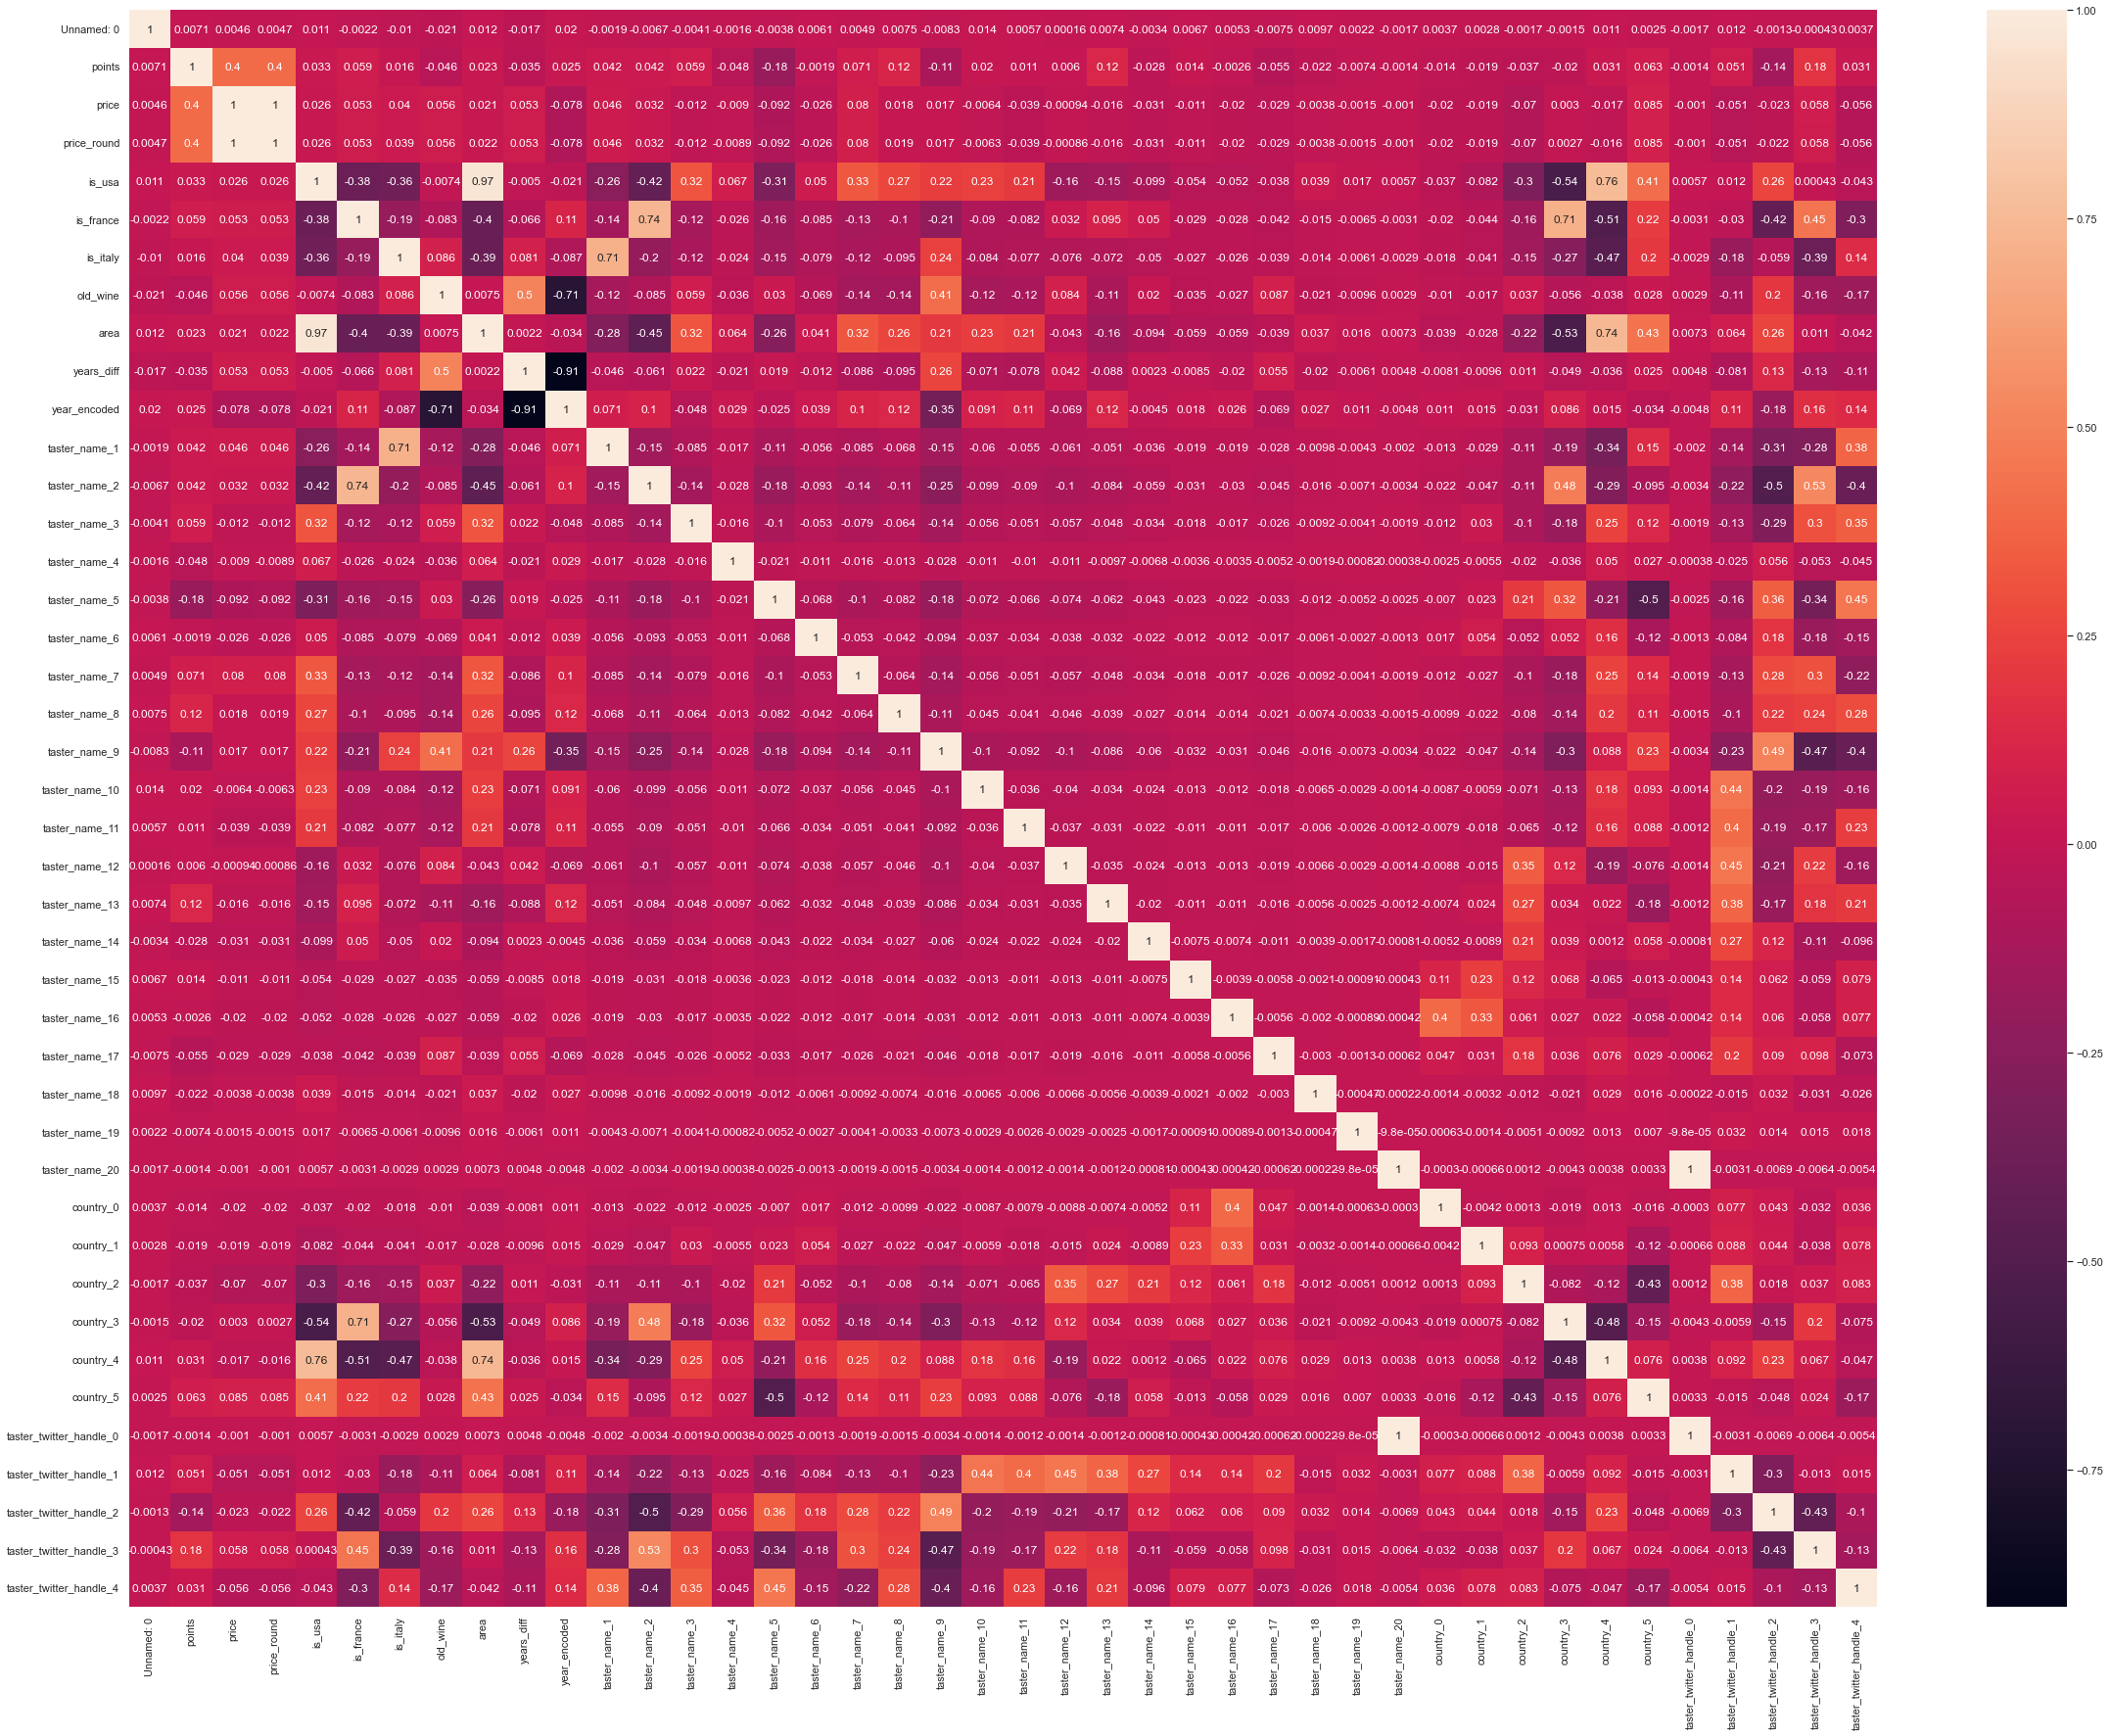

In [207]:
# 7.4
# Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

#❗️ Удалять признак рейтинг — points нельзя!

#❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(data.corr(), annot = True)

In [212]:
data_cleared = data
data_cleared = data_cleared.drop(['price'], axis=1)
data_cleared = data_cleared.drop(['area'], axis=1)
data_cleared = data_cleared.drop(['year_encoded'], axis=1)


In [215]:
data_cleared = data_cleared.drop(['is_france'], axis=1)
data_cleared = data_cleared.drop(['is_italy'], axis=1)

In [217]:
data_cleared = data_cleared.drop(['taster_name_20'], axis=1)

<AxesSubplot:>

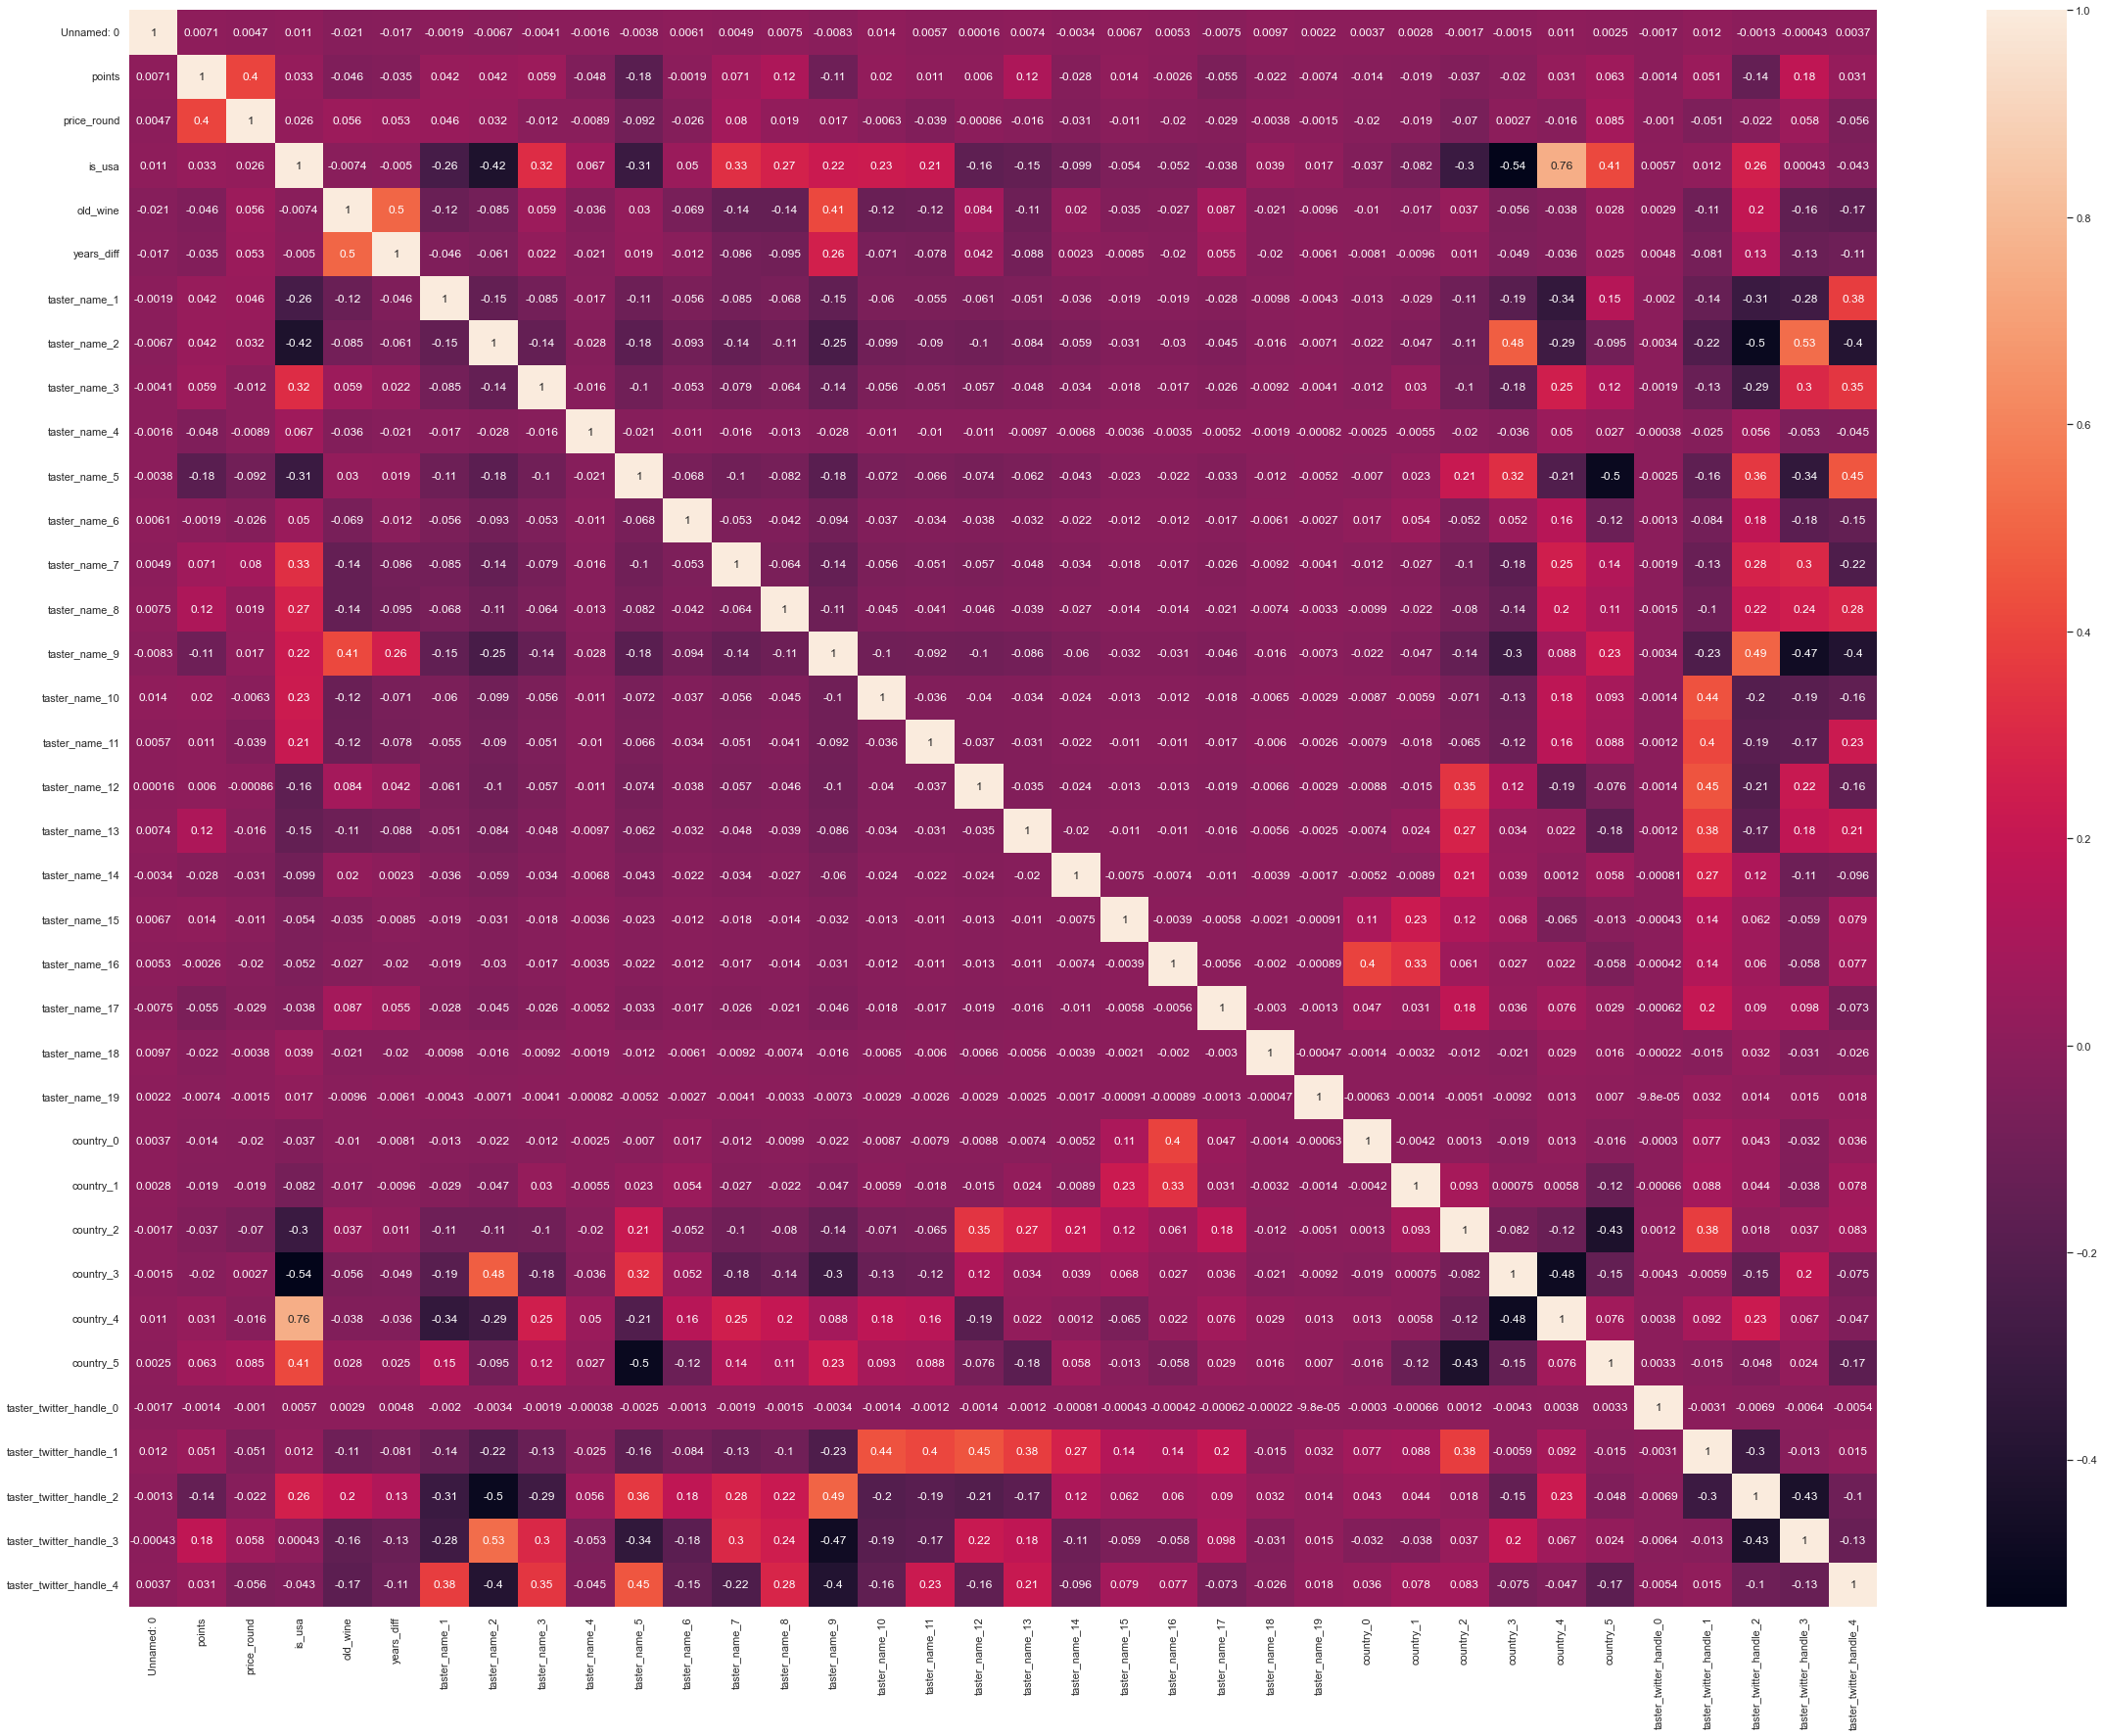

In [218]:
sns.heatmap(data_cleared.corr(), annot = True)

In [214]:
data_cleared.head()

,Unnamed: 0,country,description,designation,points,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,years_diff,taster_name_1,taster_name_2,taster_name_3,taster_name_4,taster_name_5,taster_name_6,taster_name_7,taster_name_8,taster_name_9,taster_name_10,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20,country_0,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",3298.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",4029.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",3298.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",3298.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",3664.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1


### Проверка знаний

In [219]:
# Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

# Датасет содержит следующие признаки:

# age — возраст
# sex — пол (1 - мужчина, 0 - женщина)
# cp — тип боли в груди (4 значения)
# trestbps — артериальное давление в покое
# chol — холестерин сыворотки в мг/дл
# fbs — уровень сахара в крови натощак > 120 мг/дл
# restecg — результаты электрокардиографии в покое (значения 0,1,2)
# thalach — достигнута максимальная частота сердечных сокращений
# exang — стенокардия, вызванная физической нагрузкой
# oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
# slope — наклон пикового сегмента ST при нагрузке
# ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
# thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [267]:
heart = pd.read_csv('data/heart.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [268]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [269]:
# 8.1
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
# В ответ введите результат выполнения кода heart['old'].sum().

heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

In [270]:
heart = heart.drop(['trestbps_mean'], axis =1)

KeyError: "['trestbps_mean'] not found in axis"

In [271]:
# 8.2
# Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. 
# trestbps — систолическое артериальное давление в состоянии покоя.
# Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

# Возраст (лет)	Мужчины	Женщины
# до 20	123/76	116/72
# 21-30	126/79	120/75
# 31-40	129/81	127/80
# 41-50	135/83	137/84
# 51-60	142/85	144/85
# 61 и старше	142/80	159/85


heart.loc[((heart['old']<=20) & (heart['sex']==1)), 'trestbps_mean'] =  123
heart.loc[((heart['old']<=20) & (heart['sex']==0)), 'trestbps_mean'] =  116

heart.loc[((heart['age']>20) & (heart['age']<=30) & (heart['sex']==1)), 'trestbps_mean'] =  126
heart.loc[((heart['age']>20) & (heart['age']<=30) & (heart['sex']==0)), 'trestbps_mean'] =  120

heart.loc[((heart['age']>30) & (heart['age']<=40) & (heart['sex']==1)), 'trestbps_mean'] =  129
heart.loc[((heart['age']>30) & (heart['age']<=40) & (heart['sex']==0)), 'trestbps_mean'] =  127

heart.loc[((heart['age']>40) & (heart['age']<=50) & (heart['sex']==1)), 'trestbps_mean'] =  135
heart.loc[((heart['age']>40) & (heart['age']<=50) & (heart['sex']==0)), 'trestbps_mean'] =  137

heart.loc[((heart['age']>50) & (heart['age']<=60) & (heart['sex']==1)), 'trestbps_mean'] =  142
heart.loc[((heart['age']>50) & (heart['age']<=60) & (heart['sex']==0)), 'trestbps_mean'] =  144

heart.loc[((heart['age']>60) & (heart['sex']==1)), 'trestbps_mean'] =  142
heart.loc[((heart['age']>60) & (heart['sex']==0)), 'trestbps_mean'] =  159


# В ответ напишите значение признака trestbps_mean для пациента под номером 300.
heart.iloc[300]

age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

In [272]:
# 8.3
# Проанализируйте датасет и выберите категориальные признаки.

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,141.669967
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,7.437821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,159.000000


In [273]:
# 8.4
# Вышеперечисленные категориальные признаки уже представлены в числовом виде. 
# Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding).

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144.0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135.0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142.0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142.0


In [274]:
# 8.5
# Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

# thal
# ca 
# slope
# restecg
# cp

# Сколько признаков получилось в датасете?

encoder = ce.OneHotEncoder(cols=['thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['thal'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['ca']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['ca'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['slope']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['slope'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['restecg']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['restecg'])
heart = pd.concat([heart, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['cp']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['cp'])
heart = pd.concat([heart, type_bin], axis=1)

In [262]:
heart.shape

(303, 35)

In [287]:
# 8.6
# Нормализуйте все числовые признаки подходящим способом.

#В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

mm_scaler = preprocessing.RobustScaler()
col_names = ['chol', 'trestbps', 'thalach', 'oldpeak']
df_mm = mm_scaler.fit_transform(heart[col_names])
df_mm = pd.DataFrame(df_mm, columns=col_names)
df_mm.describe()

,chol,trestbps,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000
mean,0.098646,0.081188,-0.103173,0.149752
std,0.816232,0.876907,0.704774,0.725672
min,-1.795276,-1.800000,-2.523077,-0.500000
25%,-0.456693,-0.500000,-0.600000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.543307,0.500000,0.400000,0.500000
max,5.102362,3.500000,1.507692,3.375000


<AxesSubplot:>

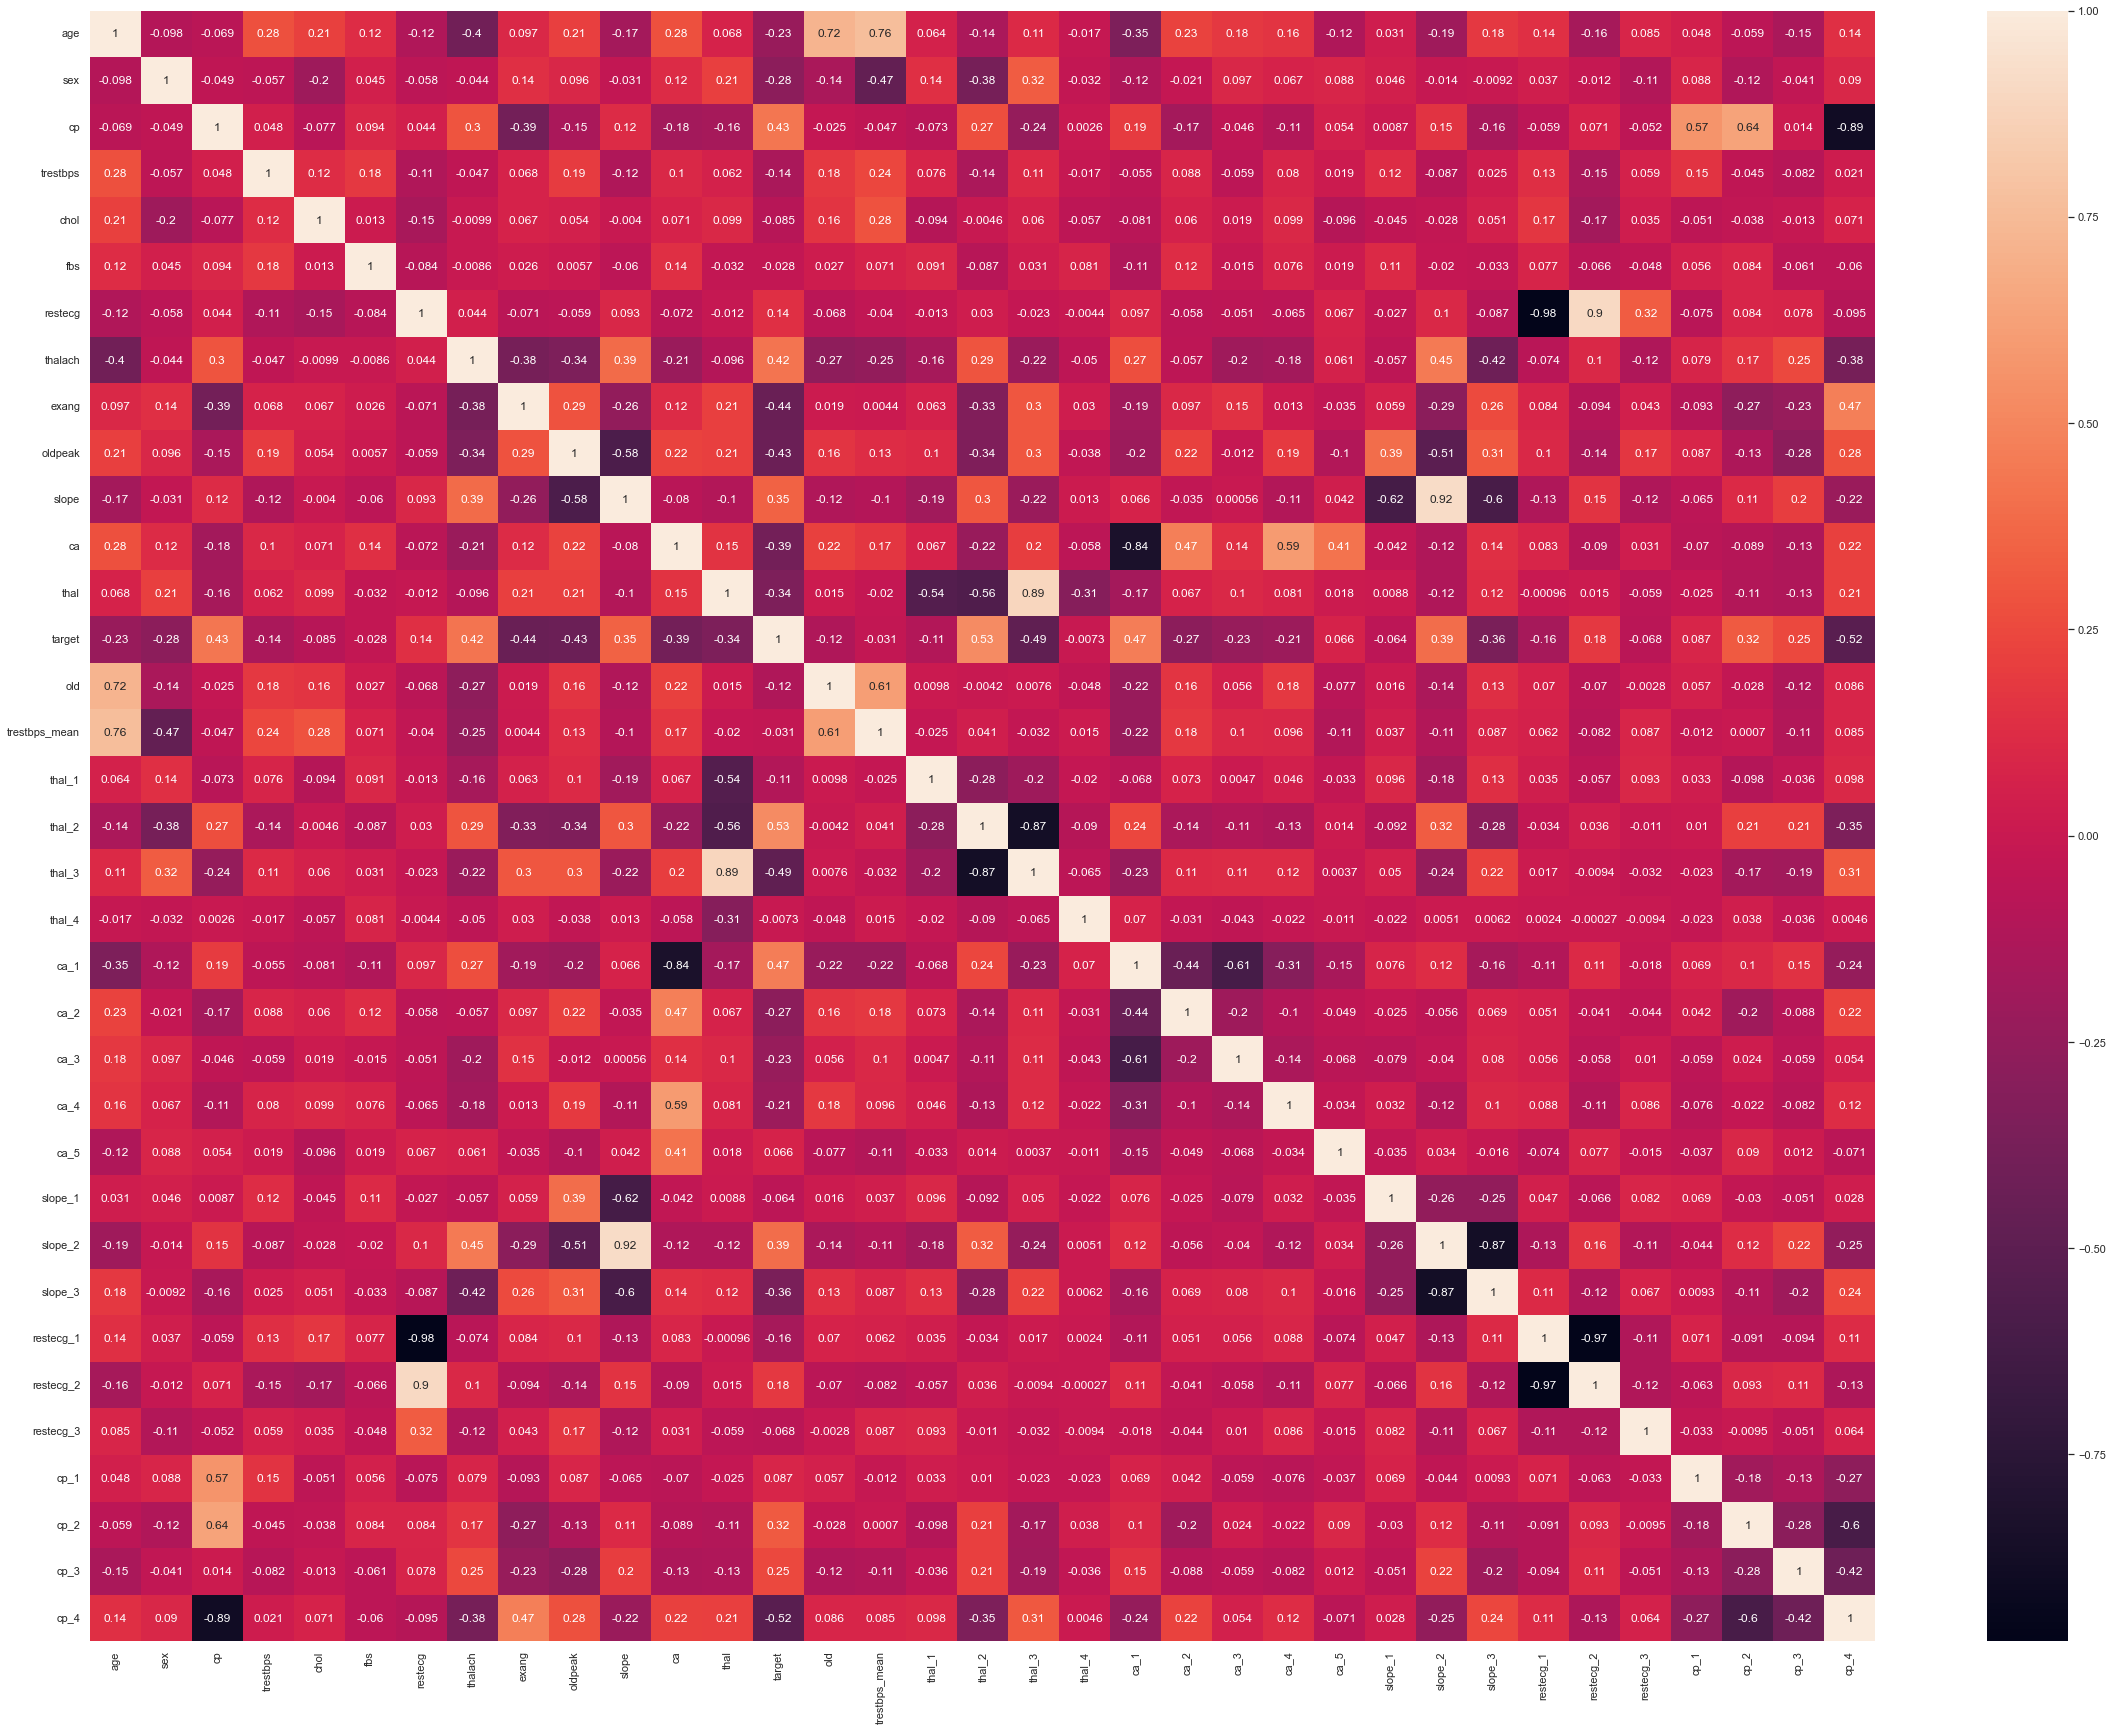

In [288]:
# 8.7
# Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков

sns.heatmap(heart.corr(), annot=True) # включаем отображение коэффициентов